**This file is used for exploring the data**

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np

In [33]:

df = pd.read_csv("cleaned_data.csv", 
                 parse_dates=["date_transaction", "date", "time"])

# Convert the time column to string or time format
df["time"] = pd.to_datetime(df["time"], format="%H:%M:%S") 
df["year_month"] = df["date"].dt.to_period("M")
df = df[df["year_month"] != "2025-03"]
date_counts = df["year_month"].value_counts().sort_index()
df["weekday"] = df["date"].dt.day_name()


print(df.head(10))
print(df.columns)
print(df.dtypes)

   Unnamed: 0 date_transaction  \
0           0       2023-11-21   
1           1       2023-12-07   
2           2       2023-12-11   
3           3       2024-01-05   
4           4       2024-01-08   
5           5       2024-01-11   
6           6       2024-01-16   
7           7       2024-01-23   
8           8       2024-01-29   
9           9       2024-01-29   

                                   payment_reference       date currency  \
0  "Zahlungsreferenz: BURGERISTA   2361  K2   21.... 2023-11-21      EUR   
1  "Zahlungsreferenz: BURGERISTA   2361  K2   06.... 2023-12-06      EUR   
2  "Zahlungsreferenz: BURGERISTA   2361  K2   08.... 2023-12-08      EUR   
3  "Zahlungsreferenz: BURGERISTA   2361  K2   04.... 2024-01-04      EUR   
4  "Zahlungsreferenz: BURGERISTA   2361  K2   06.... 2024-01-06      EUR   
5  "Zahlungsreferenz: BURGERISTA   2361  K2   10.... 2024-01-10      EUR   
6  "Zahlungsreferenz: BURGERISTA   2361  K2   16.... 2024-01-16      EUR   
7  "Zahlungsrefer

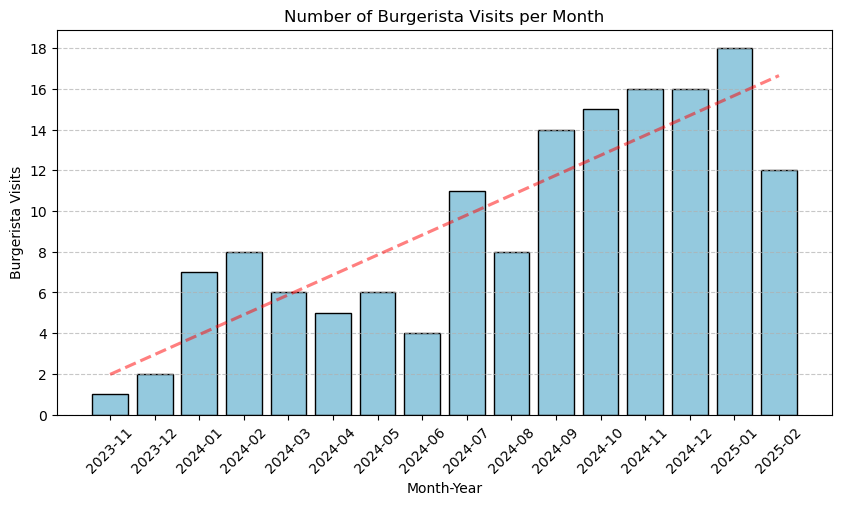

In [4]:
plt.figure(figsize=(10,5))
x_values = range(len(date_counts))

y_values = date_counts.values

sns.barplot(x=date_counts.index.astype(str), y=y_values, color="skyblue", edgecolor="black")

# trendline
sns.regplot(x=list(x_values), y=y_values, scatter=False, color="red", ci=None, line_kws={'linestyle': '--', 'alpha': 0.5})

plt.xlabel("Month-Year")
plt.ylabel("Burgerista Visits")
plt.title("Number of Burgerista Visits per Month")
plt.gca().yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [5]:
def mean_visit(df):
    visits = df.shape[0]
    min_date = df["date"].min()
    max_date = df["date"].max()
    date_range = pd.date_range(start=min_date, end=max_date)
    date_count = len(date_range)
    mean_visit_value = date_count / visits
    return mean_visit_value

In [6]:
total_burgers = df.shape[0] * 2
total_money_spent = df["price"].sum()
visits = df.shape[0]

mask_jan = df["year_month"] == "2025-01"
jan = df[mask_jan]

mean_visit_all = mean_visit(df)
mean_visit_jan = mean_visit(jan)


print("Quick summary:")
print("-" * 20)
print(f"Total Burgers eaten: {total_burgers}")
print(f"Total Money spent: {total_money_spent:.2f} €")
print(f"Total Burgerista Visits: {visits}")
print(f"Since Nov 2023 a Visit every {mean_visit_all:.2f} days")
print(f"In January 2025 a Visit every {mean_visit_jan:.2f} days")

Quick summary:
--------------------
Total Burgers eaten: 298
Total Money spent: 1022.20 €
Total Burgerista Visits: 149
Since Nov 2023 a Visit every 3.12 days
In January 2025 a Visit every 1.72 days


In [24]:
def plot_weekdays(df):
    plt.figure(figsize=(10,5))
    weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    df["weekday"] = pd.Categorical(df["weekday"], categories=weekday_order, ordered=True)
    
    # Count occurrences per weekday, ensuring the correct order
    weekday_counts = df["weekday"].value_counts().reindex(weekday_order, fill_value=0)
    plt.bar(weekday_counts.index, weekday_counts.values, color="skyblue", edgecolor="black")

    # Set the y-axis to percentage format
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=len(df)))
    
    plt.xlabel("Weekdays")
    plt.ylabel("Percentage of Visits")
    plt.title("Weekdays")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

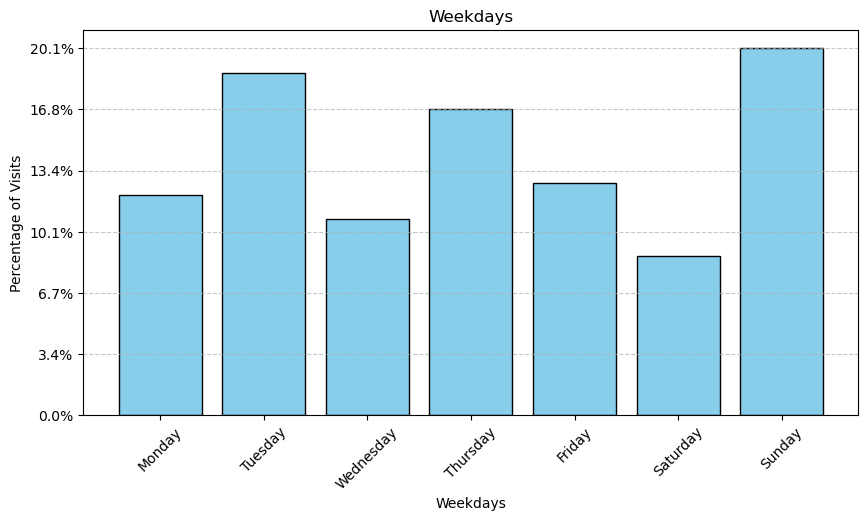

In [25]:
plot_weekdays(df)

In [64]:
def plot_time_distribution(df):
    df["hour"] = df["time"].dt.hour
    hour_counts = df["hour"].value_counts().sort_index()
    # hour_percentages = (hour_counts /  df.shape[0])
    
    plt.figure(figsize=(10, 5))
    plt.bar(hour_counts.index, hour_counts.values, color="skyblue", edgecolor="black")
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=len(df)))
    plt.xlabel("Hour of the Day")
    plt.ylabel("Percentage of Visits")
    plt.title("% of Visits by Hour")
    plt.xticks(range(11, 22))
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

def plot_time_by_weekday(df):
    df["hour"] = df["time"].dt.hour
    weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    df["weekday"] = pd.Categorical(df["weekday"], categories=weekday_order, ordered=True)

    # Create pivot table (counts per weekday & hour)
    heatmap_data = df.groupby(["weekday", "hour"]).size().unstack(fill_value=0)
    heatmap_data = heatmap_data / df.shape[0] * 100

    # Plot heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5)
    plt.xlabel("Hour of the Day")
    plt.ylabel("Weekday")
    plt.title("% of Visits by Weekday and Hour")
    plt.show()


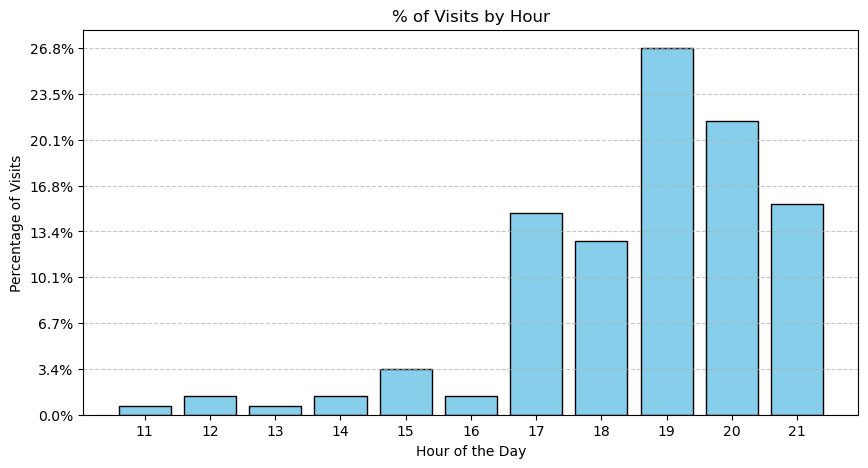

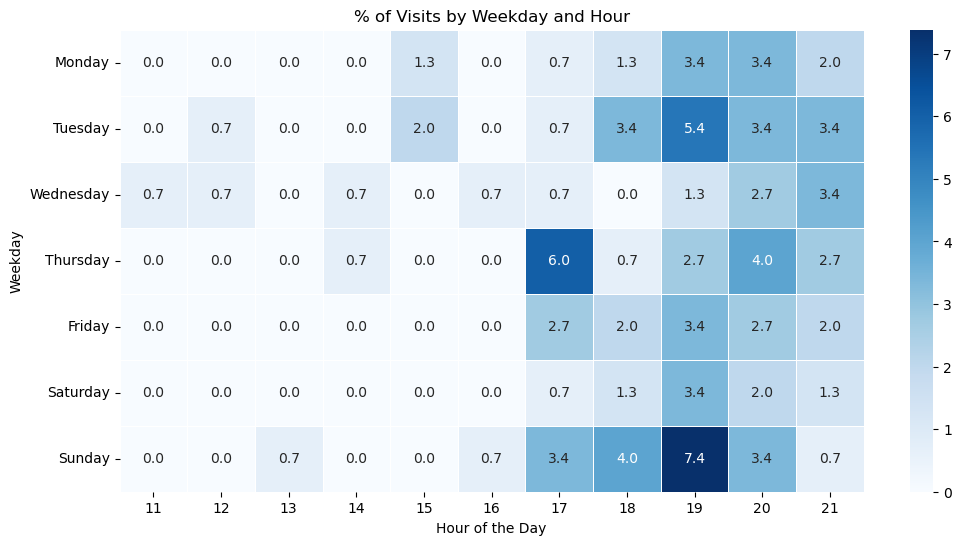

In [65]:
plot_time_distribution(df)
plot_time_by_weekday(df)

In [ ]:
# defining nutrional need
kcal = 3000
fats = 90
carbs = 420
protein = 70

# nutrional data for a Burgerista cheeseburger
b_kcal = 561
b_fats = 30
b_carbs = 50
b_protein = 22